### 1. Khai báo thư viện người dùng

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### 2. Khởi tạo dữ liệu

In [8]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [9]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [10]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,44.448335,19.023416,8.809050,6.267018,23.719141
1,54.966806,8.085940,11.191175,18.728819,20.919044
2,43.026616,18.373016,9.824707,9.477856,20.275992
3,49.764465,6.591240,8.224314,24.782232,21.992008
4,48.943483,9.399923,12.529265,14.554783,21.732612


### 3. Trực quan hoá dữ liệu sinh ra

<AxesSubplot:ylabel='Density'>

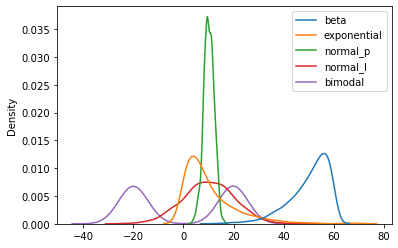

In [11]:
sns.kdeplot(data=df)


### 4. Hiển thị thống kê về dữ liệu sinh ra

In [12]:
df.describe()


,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.183289,10.338309,10.137551,10.080837,-0.026780
std,8.060340,10.491443,2.051979,10.188299,20.128723
min,12.770309,0.000212,3.630309,-23.376233,-29.187764
25%,46.031047,2.973465,8.714011,3.639587,-20.034298
50%,52.198054,7.009308,10.051917,10.208496,0.186333
75%,56.359716,14.253915,11.519996,16.864520,19.936190
max,59.992529,69.023118,16.117918,51.391785,29.425723


### 5. Thêm một đặc trưng với giá trị lớn hơn nhiều

<AxesSubplot:ylabel='Density'>

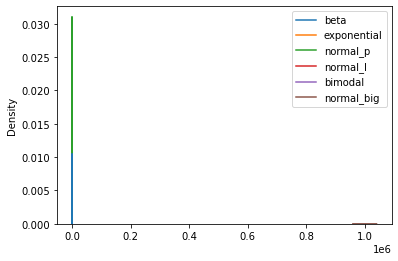

In [13]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

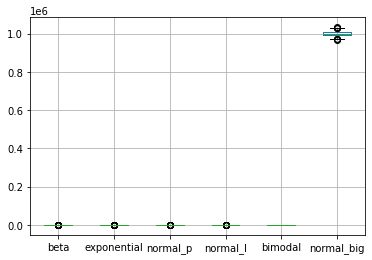

In [14]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

### 6. Chuẩn hoá với Min-Max scaling

In [15]:
# Khai báo đối tượng MinMaxScaler
scaler = MinMaxScaler()

In [16]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [17]:
df_s.head()


,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.670829,0.275607,0.414710,0.396470,0.902640,0.342011
1,0.893573,0.117146,0.605469,0.563143,0.854868,0.681683
2,0.640722,0.266184,0.496044,0.439414,0.843897,0.468592
3,0.783406,0.095490,0.367885,0.644105,0.873174,0.307144
4,0.766020,0.136182,0.712623,0.507316,0.868748,0.331884


<AxesSubplot:ylabel='Density'>

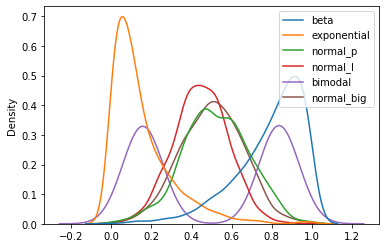

In [18]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

<AxesSubplot:>

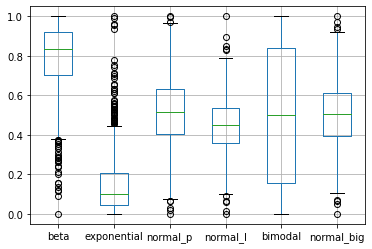

In [19]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()

In [20]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.792275,0.149778,0.521096,0.447478,0.497513,0.502658
std,0.170690,0.151999,0.164321,0.136265,0.343415,0.155928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.704345,0.043076,0.407100,0.361329,0.156167,0.395249
50%,0.834941,0.101547,0.514238,0.449186,0.501149,0.506004
75%,0.923070,0.206507,0.631801,0.538208,0.838100,0.610327
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# lấy giá trị min của cột beta
df_s['beta'].min()


0.0

In [22]:
# lấy giá trị max của cột beta
df_s['beta'].max()

1.0

In [23]:
# in các giá trị min của từng cột trong dữ liệu chưa chuẩn hóa
mins = [df[col].min() for col in df.columns]
mins

[12.770308964129525,
 0.00021152453146221917,
 3.630309487201174,
 -23.376232603281494,
 -29.187764196737504,
 966987.2545278779]

In [24]:
# in các giá trị min của từng cột trong dữ liệu đã chuẩn hóa
mins = [df_s[col].min() for col in df_s.columns]
mins

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [25]:
# in các giá trị max của từng cột dữ liệu chưa chuẩn hóa
maxs = [df[col].max() for col in df.columns]
maxs

[59.99252867491962,
 69.02311821748525,
 16.11791776045169,
 51.39178529337552,
 29.42572314538529,
 1032430.2940207925]

In [26]:
# in các giá trị max của từng cột dữ liệu đã chuẩn hóa
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[1.0, 1.0, 0.9999999999999998, 1.0, 1.0, 1.0]